Import modules

In [10]:
import pyPCG as pcg
import pyPCG.io as signal_io

Read in example data

In [11]:
data, fs = signal_io.read_signal_file("example.mat","mat")
example = pcg.pcg_signal(data,fs)

Create a pipeline to center and scale the signal
(This could have been done with `pcg.normalize`)

In [12]:
norm = pcg.process_pipeline(pcg.zero_center,pcg.unit_scale)
normd = norm.run(example)

Plot the data

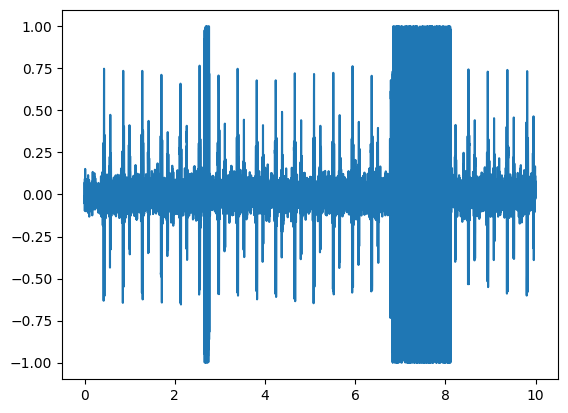

In [13]:
pcg.plot(normd)

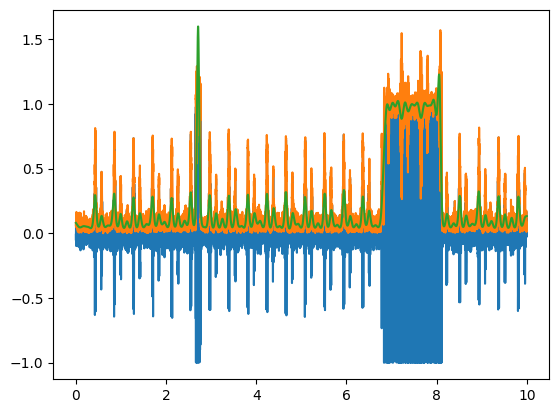

In [14]:
import pyPCG.preprocessing as preproc

h_env = preproc.homomorphic(normd)
pcg.plot(normd)

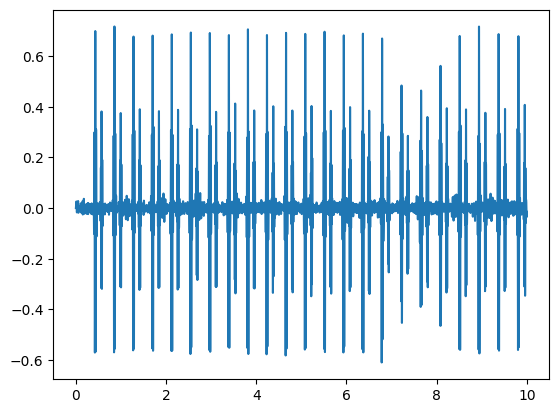

In [15]:
BP_filterd = preproc.filter(preproc.filter(normd,6,100,"LP"),6,20,"HP")
pcg.plot(BP_filterd)

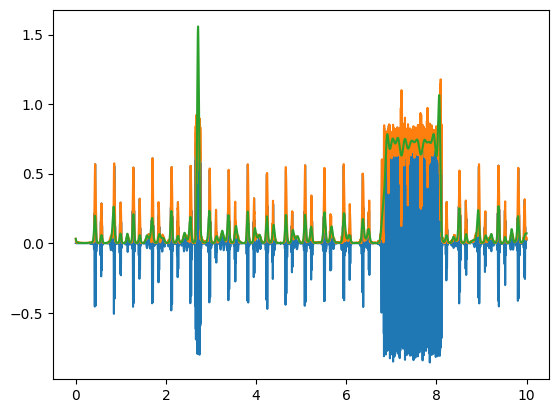

In [16]:
WT_den = preproc.wt_denoise(normd)
preproc.homomorphic(WT_den)
pcg.plot(WT_den)